#### # Traffic Accident Data Analysis
This notebook analyzes traffic accident data to identify patterns related to road conditions, weather, and time of day.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('traffic_accidents.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [5]:
df.shape # to find the shape (rows,columns)of the dataset

(209306, 24)

In [6]:
df.duplicated().value_counts()

False    209275
True         31
Name: count, dtype: int64

In [7]:
df=df.drop_duplicates()
df.duplicated().value_counts()

False    209275
Name: count, dtype: int64

In [8]:
# To find basic stats of the data 
df.describe()
# NOTE: when we use df.describe() it will give stats for only nuerical columns, it wont give for categorical columns

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000
mean,2.063299,0.382707,0.001859,0.038103,0.221226,0.121520,2.244019,13.372897,4.144045,6.771798
std,0.396030,0.799720,0.047505,0.233971,0.614939,0.450884,1.241159,5.604019,1.966880,3.427626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [13]:
# To find basic stats for only categorical column
df.describe(include='object')

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
count,209275,209275,209275,209275,209275,209275,209275,209275,209275,209275,209275,209275,209275,209275
unique,189087,19,12,6,18,20,6,7,7,2,2,3,40,5
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
freq,10,123923,164673,134083,64150,77737,204561,155878,171702,117356,199294,147294,58310,154767


#### ## Visualizing Accident Patterns
We’ll explore patterns by weather, road surface condition, hour of day, and generate a time-based heatmap.


C:\Users\kelle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kelle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


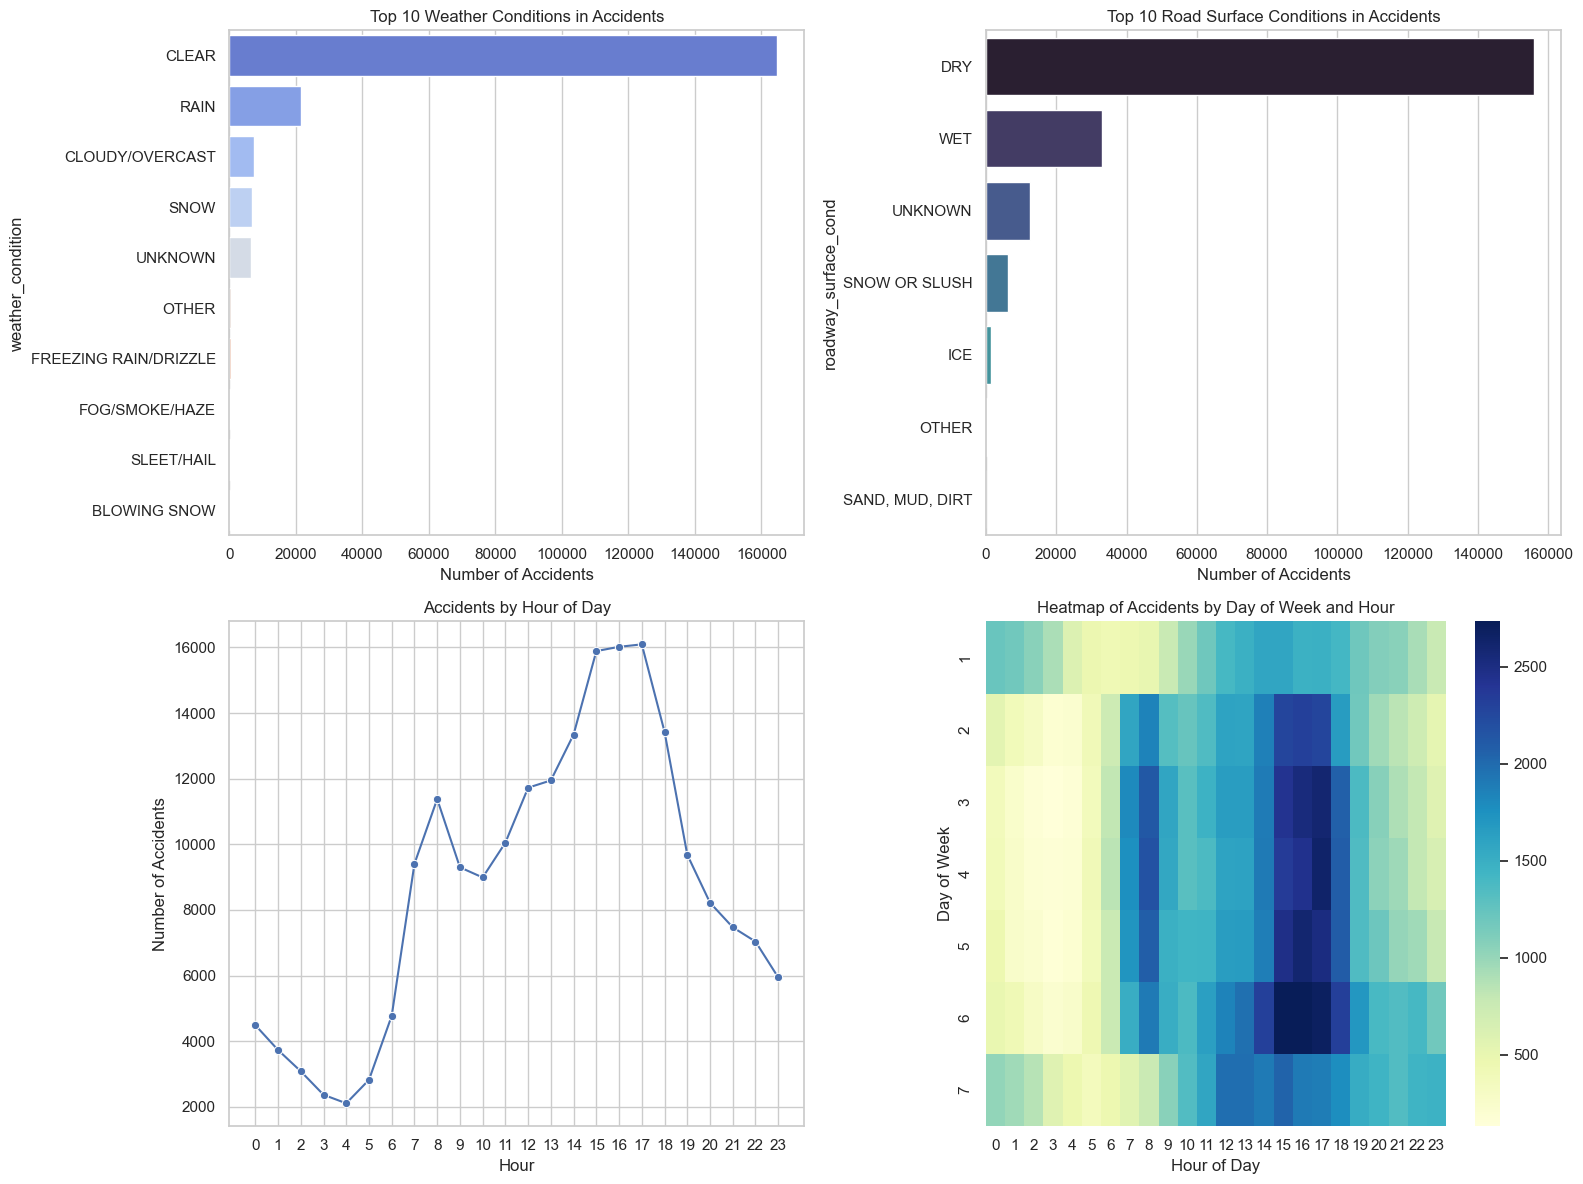

In [14]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Weather conditions
plt.subplot(2, 2, 1)
weather_counts = df['weather_condition'].value_counts().head(10)
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="coolwarm")
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Number of Accidents')

# Roadway surface conditions
plt.subplot(2, 2, 2)
road_surface_counts = df['roadway_surface_cond'].value_counts().head(10)
sns.barplot(x=road_surface_counts.values, y=road_surface_counts.index, palette="mako")
plt.title('Top 10 Road Surface Conditions in Accidents')
plt.xlabel('Number of Accidents')

# Hourly distribution
plt.subplot(2, 2, 3)
hourly_counts = df['crash_hour'].value_counts().sort_index()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))

# Heatmap
plt.subplot(2, 2, 4)
heatmap_data = df.pivot_table(index='crash_day_of_week', columns='crash_hour', values='crash_type', aggfunc='count')
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Accidents by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.tight_layout()
plt.show()